## LETK Filtering


In [1]:
import Simulator
import Observation
import Statistics
import LEnKalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_11-14_10_29"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
statistics = Statistics.Statistics(simulator, N_e=100)

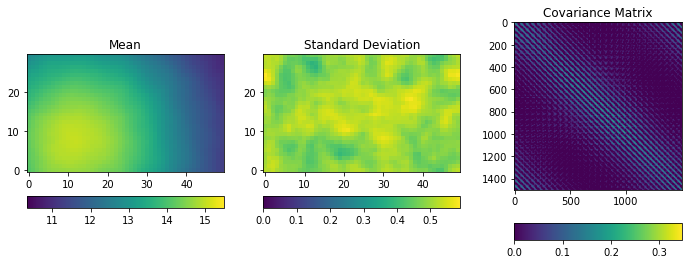

In [4]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [5]:
obs_timestamp = "2021_08_11-14_10_37"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


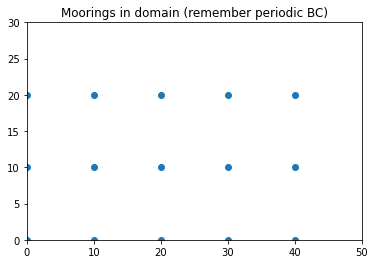

In [6]:
observation.plot_positions()

## LETKF filtering

Updating/conditioning the distributions at every observation time

In [7]:
lenkFilter = LEnKalmanFilter.LEnKalman(statistics, observation, 5)

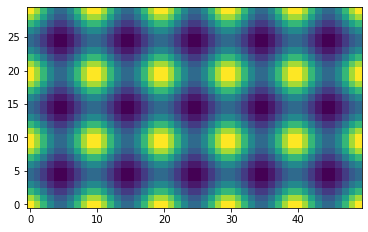

In [8]:
from matplotlib import pyplot as plt
plt.imshow(lenkFilter.W_analysis, origin="lower")

In [9]:
import numpy as np

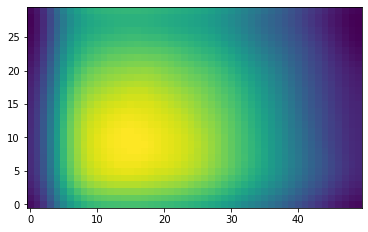

In [10]:
statistics.propagate(25)
plt.imshow(np.reshape(statistics.mean, (grid.ny, grid.nx)), origin="lower")
plt.show()

In [11]:
observation.obses[0][13]

13.995845880558395

In [12]:
(observation.H @ statistics.mean)[13]

13.684224176886307

(array([ 5.,  6., 11., 18., 18., 25.,  7.,  7.,  2.,  1.]),
 array([12.66564162, 12.8947323 , 13.12382297, 13.35291365, 13.58200432,
        13.81109499, 14.04018567, 14.26927634, 14.49836701, 14.72745769,
        14.95654836]),
 <BarContainer object of 10 artists>)

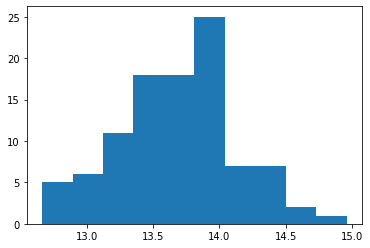

In [13]:
plt.hist((observation.H @ statistics.ensemble.ensemble)[13])

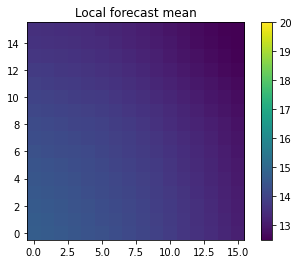

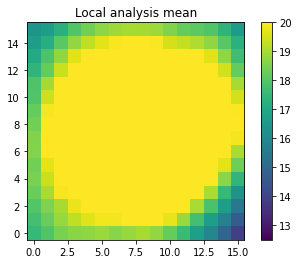

array([[0.35733092, 0.35568138, 0.36819485, ..., 0.3831016 , 0.37632175,
        0.36206439],
       [1.62096797, 1.6318873 , 1.6870122 , ..., 1.7636798 , 1.7237197 ,
        1.67053471],
       [3.56140257, 3.63473063, 3.70966021, ..., 3.88768183, 3.83151605,
        3.73459068],
       ...,
       [3.56618062, 3.50902035, 3.63537775, ..., 3.86271982, 3.70794645,
        3.57846409],
       [1.64077284, 1.61349452, 1.66928432, ..., 1.75755424, 1.70671116,
        1.64870346],
       [0.35868476, 0.35666348, 0.36590618, ..., 0.38245177, 0.37426719,
        0.36187935]])

In [14]:

lenkFilter.filter(statistics.ensemble.ensemble, observation.obses[0])


In [95]:
from matplotlib import pyplot as plt 
import numpy as np

In [153]:
statistics.set_prior(prior_args)
statistics.propagate(25)

In [154]:
X_f = statistics.ensemble.ensemble

In [155]:
d = 13

L = lenkFilter.all_Ls[13]

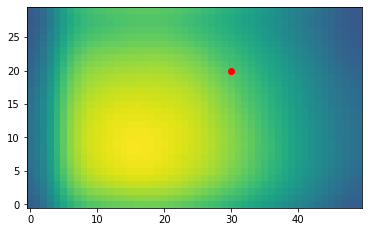

In [156]:
plt.imshow(np.reshape(np.average(X_f, axis=1), (grid.ny,grid.nx)), origin="lower", vmin=10, vmax=15)

plt.scatter(lenkFilter.observation_positions[d][0]/grid.dx, lenkFilter.observation_positions[d][1]/grid.dy, c ="red")

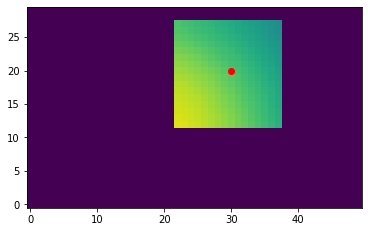

In [157]:
plt.imshow(np.reshape(np.average(statistics.ensemble.ensemble, axis=1), (grid.ny,grid.nx))*1.0*L, origin="lower", vmin=10, vmax=15)

plt.scatter(lenkFilter.observation_positions[d][0]/grid.dx, lenkFilter.observation_positions[d][1]/grid.dy, c ="red")

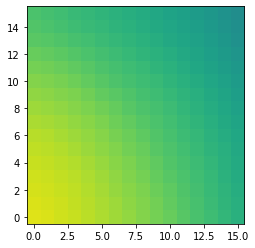

In [158]:
X_f_loc = np.reshape(statistics.ensemble.ensemble, (grid.ny, grid.nx, 100))[L,:]
plt.imshow(np.reshape(np.average(X_f_loc, axis=1),(16,16)), origin="lower", vmin=10, vmax=15)

In [159]:
HX_f_d = (observation.H @ X_f)[d]

In [160]:
H_idx = np.where(np.sum(X_f_loc == HX_f_d, axis=1) > 0)[0][0]

In [161]:
H_loc = np.zeros((1,256))
H_loc[0,H_idx] = 1

In [162]:
HX_f_loc = H @ X_f_loc

In [163]:
X_f_loc_mean = np.reshape(np.average(X_f_loc, axis=1),(256,1))

In [164]:
C = 1/(100-1)*((X_f_loc-X_f_loc_mean) @ (X_f_loc-X_f_loc_mean).T)

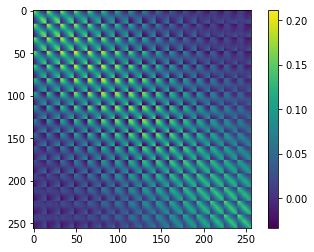

In [165]:
plt.imshow(C)
plt.colorbar()

In [166]:
R = observation.R[d,d]
R

0.010000000000000002

In [169]:
S = H_loc @ C @ H_loc.T + R
S

array([[0.11644668]])

In [170]:
K = C @ H.T @ np.linalg.inv(S)
K

array([[0.07858615],
       [0.125056  ],
       [0.13476842],
       [0.14668745],
       [0.17252226],
       [0.20816713],
       [0.21644809],
       [0.22121477],
       [0.23620857],
       [0.2309154 ],
       [0.20825434],
       [0.19616899],
       [0.19351683],
       [0.19684782],
       [0.18326595],
       [0.160108  ],
       [0.13982444],
       [0.16557454],
       [0.17728326],
       [0.20036536],
       [0.25345809],
       [0.26749286],
       [0.26379723],
       [0.28159626],
       [0.3067658 ],
       [0.29877914],
       [0.29052139],
       [0.26418044],
       [0.2375959 ],
       [0.22107602],
       [0.20804964],
       [0.19945532],
       [0.18494158],
       [0.21598502],
       [0.25281632],
       [0.30596194],
       [0.34354411],
       [0.34877408],
       [0.35787354],
       [0.38120154],
       [0.39445107],
       [0.37988984],
       [0.37664558],
       [0.33939242],
       [0.2973121 ],
       [0.25114504],
       [0.22318114],
       [0.220

In [171]:
D = observation.obses[0][d] - HX_f_loc + np.random.normal(0, np.sqrt(R), 100)
D

array([[ 8.38544732e-01,  9.79182865e-01,  1.44499391e-01,
         8.05898658e-02,  1.43630011e-01,  4.57337799e-01,
        -3.96664927e-01,  3.65769288e-01,  6.82079054e-01,
        -3.02649064e-02,  2.28959321e-01,  5.14853796e-01,
         2.79157662e-01,  4.10986793e-01,  2.82331546e-01,
        -2.00963445e-02,  5.47861479e-01,  7.16019403e-01,
         7.54090499e-01,  7.30469613e-01,  7.74457268e-01,
         3.83716537e-01, -1.21159108e-01,  2.27899586e-01,
        -3.89016748e-01, -2.45569390e-01, -1.34323401e-01,
         3.92659107e-01,  7.27871428e-01,  4.33138405e-01,
         5.25172340e-01,  6.68740702e-01,  5.93517457e-01,
         1.28002794e-01,  4.82689062e-01,  8.01320157e-01,
         4.29083212e-02, -6.50345541e-04,  3.96793031e-01,
         1.05624533e+00,  7.16167544e-01,  4.79456722e-01,
         5.81524417e-01,  1.11544886e-01,  4.38094251e-01,
         7.61968216e-01, -2.73719181e-01, -2.33117499e-02,
        -4.40073939e-03,  9.70991378e-02,  5.19197429e-0

In [173]:
X_a_loc = X_f_loc + K @ D

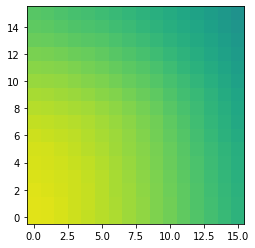

In [174]:
plt.imshow(np.reshape(np.average(X_a_loc, axis=1),(16,16)), origin="lower", vmin=10, vmax=15)